In [1]:
import os
from datasets import *
from nets import *

device = th.device('cuda:0' if th.cuda.is_available() else 'cpu')
print(f"device: {device}")

device: cpu


In [2]:
with open('.//_Data/colab_dataset.pkl', 'rb') as f:
    full_dataset = pickle.load(f)

fold = 2
tds = HASYv2Dataset()
vds = HASYv2Dataset()
tds.cross_val(fold, True, full_dataset)
vds.cross_val(fold, False, full_dataset)
tds.to(device)
vds.to(device)
print(tds.device, vds.device)
print(len(tds), len(vds))
del full_dataset    # In order to avoid using all of the available memory

cpu cpu
151288 16945


In [ ]:
# with open('.//_Reports/TwoLayerTest1 - 2021-11-12 16_34_06.229661/best_model.pkl', 'rb') as f:
#     model = pickle.load(f)

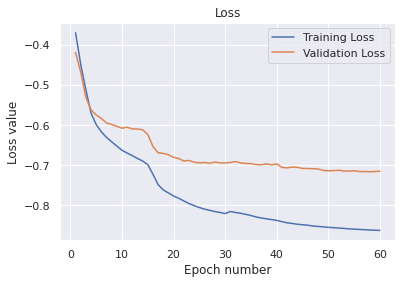

In [ ]:
# model.trainclass.plot()

In [ ]:
from training import *
from lightning_objects import train_lightning_model
tdl = DataLoader(tds, batch_size = 1, shuffle=True)
vdl = DataLoader(vds, batch_size = 10000)
import json
with open("_configs/config-two_layer.json", "r") as f:
    config = json.load(f)
loader_tuple = (tdl, vdl)
train_lightning_model(config, loader_tuple)

Seed set to 74
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/miniconda3/envs/cnn_project/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name  | Type     | Params | Mode 
-------------------------------------------
0 | model | TwoLayer | 2.7 M  | train
1 | loss  | NLLLoss  | 0      | train
-------------------------------------------
2.7 M     Trainable params
0         Non-trainable params
2.7 M     Total params
10.630    Total estimated model params size 

Report "TwoLayer_lightning" already exists, creating a new name: TwoLayer_lightning - 2024-12-26 10_25_43.017189


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

/opt/miniconda3/envs/cnn_project/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
/opt/miniconda3/envs/cnn_project/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [ ]:
train_model(model, 1, 1e-4, nn.NLLLoss(), (tdl, vdl))

/Users/arochaaz/Programming/GitHub/CNN-Project/training.py:462: FutureWarning: "file_name" may become deprecated in the future
  warn('"file_name" may become deprecated in the future',


1. Training loss: -0.8665
	Training accuracy: 86.68%
1. Validation loss: -0.7169
	Validation accuracy: 72.28%
2. Training loss: -0.8669
	Training accuracy: 86.73%
2. Validation loss: -0.7166
	Validation accuracy: 72.23%
3. Training loss: -0.8673
	Training accuracy: 86.76%
3. Validation loss: -0.7164
	Validation accuracy: 72.33%
4. Training loss: -0.8675
	Training accuracy: 86.78%
4. Validation loss: -0.7165
	Validation accuracy: 72.29%
5. Training loss: -0.8678
	Training accuracy: 86.81%
5. Validation loss: -0.7157
	Validation accuracy: 72.12%
6. Training loss: -0.8682
	Training accuracy: 86.84%
6. Validation loss: -0.7178
	Validation accuracy: 72.30%
7. Training loss: -0.8684
	Training accuracy: 86.86%
7. Validation loss: -0.7158
	Validation accuracy: 72.26%
8. Training loss: -0.8687
	Training accuracy: 86.90%
8. Validation loss: -0.7167
	Validation accuracy: 72.28%
9. Training loss: -0.8689
	Training accuracy: 86.92%
9. Validation loss: -0.7172
	Validation accuracy: 72.30%
10. Traini

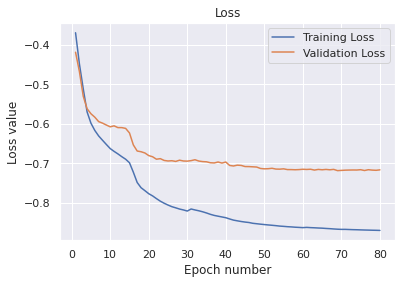

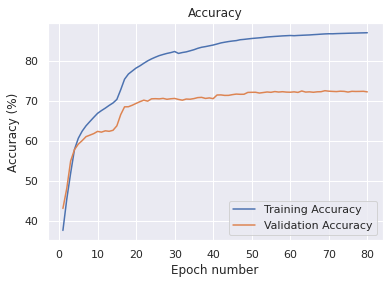

Time for running function train_model:
0.0 hours, 9.0 minutes and 58.28594446182251 seconds


In [ ]:
train_model(model, 10, 1e-4, nn.NLLLoss(), (tdl, vdl))